# CSCI-P556
## Assignment 1
### Due date: 5:30PM, September 26, 2018


---



## Question 1: Binary Classification (35 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Like we did in linear regression, let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

### Task 1
Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 (i.e. $y=-1$) and $k_1$ points on the side of class 1 (i.e. $y=1$). Use the function you wrote in the previous assignment to plot this dataset!

In [2]:
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import pandas as pd

def plotLineAndPoints(l1,l2,c=0):
    x_val1 = [x[0] for x in l1]
    y_val1 = [x[1] for x in l1]
    
    x_val2 = [x1[0] for x1 in l2]
    y_val2 = [x1[1] for x1 in l2]
     
    if c==0:
        plt.plot(x_val1,y_val1,'r+',x_val2,y_val2,'bo')
        plt.xlabel('X Axis')
        plt.ylabel('Y Axis')
        plt.legend(['L1', 'L2'], loc='upper left')
    
    else:
        plt.plot(x_val1,y_val1,'r+',x_val2,y_val2,'bo')
        x_rand = []
        y_rand = []
        a,b,c = c[0],c[1],c[2]
        k1 = len(x_val1)
        k2 = len(x_val2)
        k = 2*(k1+k2)
        if(b!=0):
            x_rand = np.random.uniform(low=-50.0, high=50.0, size=k)
            for i in range(k):
                y_rand.append(((-((a*x_rand[i]) + c))/(b)) if b!=0 else 0)
        else:
            x = -c/a
            x_rand = np.full((1,k),x)
            x_rand = x_rand.T
            #print(x)
            #lst = range((x),(x+1))
            #x_rand = list(itertools.chain.from_iterable(itertools.repeat(x, k) for x in lst))
            y_rand = np.random.uniform(low=-50.0, high=50.0, size=k)

        
        plt.plot(x_rand,y_rand,color='green')
        plt.xlabel('X Axis')
        plt.ylabel('Y Axis')
        plt.legend(['Class 1', 'Class 2','Line Eqn'], loc='best')
    plt.show()

In [3]:
def generate_dataset(k0, k1):
    """
      Your code for generating the dataset goes here! The output should X and y.
      You should call the visualization function from this function. Every time we 
      run this cell, it should plot a new dataset along with the line which was used
      to generate that dataset. We will test this by changing the values of k and
      running the cell multiple times
      Input: k0 = number
              k1 = number
      Output: X = An (m x d) dimension numpy array where m is the number of samples and d is the number of features
              y = (m x 1) dimension vector where m is the number of samples
    """
    global line1,line2
    l1 = []
    l2 = []
    a1 = np.random.uniform(low=-100.0, high=100.0, size=3)
    #a1[0] = 0
    a = a1[0]
    #a1[1] = 0
    b = a1[1]
    c = a1[2]

    while (len(l1)<k0 or len(l2)<k1):
        x1 = np.random.uniform(low=-50.0, high=50.0, size=1)
        y1 = np.random.uniform(low=-50.0, high=50.0, size=1)
        x1 = x1[0]
        y1 = y1[0]
        t = (a*x1) + (b*y1) + c
        if((t>0) and len(l1)<k0):
            l1.append([x1,y1])
        if((t<0) and len(l2)<k1):
            l2.append([x1,y1])
    
    line1 = l1
    line2 = l2
    plotLineAndPoints(l1,l2,(a,b,c))  
    df1 = pd.DataFrame(list(l1))
    df1['label'] = 1
    df2 = pd.DataFrame(list(l2))
    df2['label'] = -1
    df3 = df1.append(df2)
    y = df3['label']
    del df3['label']
    df3.columns = ['X1', 'X2']
    df3 = df3.reset_index(drop=True)
    X = df3
    #X['X3'] = np.random.uniform(low=-50.0, high=50.0, size=X.shape[0])
    #X['X4'] = np.random.uniform(low=-50.0, high=50.0, size=X.shape[0])
    X = np.array(X)
    y = np.array(y)
    #line1 = l1
    #line2 = l2
    
    
    return X,y #,l1,l2

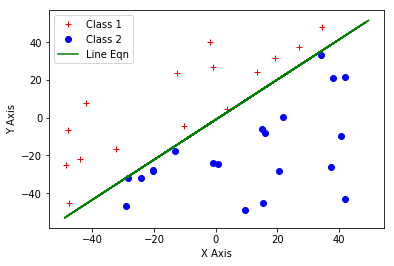

In [4]:
X,y = generate_dataset(15,20)

### Task 2

When you are given a dataset for which you do not have access the the target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$. You learn it from the data. In this problem, it is akin to learning the parameters of the line that separates the two classes. The same line above can be represented as $$\sum_{i=0}^d w_i x_i = 0$$
Notice that $i$ starts from $0$, instead of $1$. Can you think of why?

The goal here is to correctly find out $\bf{w}$. The algorithm to find it is a simple iterative process. 

1. Randomly choose a $\mathbf{w}$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
    1. Randomly choose a sample from the dataset without replacement and see if it is correctly classified. If yes,  move on to another sample.
    2. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$
    and go back to the previous step (of randomly chosing a sample)
    
        - $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
        - $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
        - $y$ is the class label for the sample under consideration
        - $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.





In [5]:
def fit(X, y):
    """
      Your code for Task 2 goes here. Apart from writing the fit function,
      you should also write code to not only plot the points in the dataset,
      but also plot the learned line represented by w. We will test this, by running 
      the cell for task 1 (thus generating a new dataset) and then running this cell.
      Even though the visualization is done for d=3 and 2-D points, your code should be
      generic and be able to handle any d. This will also be tested.

      INPUT: The output of generate_data() will go as input to this function. See 
      its definition for the dimensions of X and y
      Output: The final weight vector w.
    """
    
    
    X = pd.DataFrame(X)
    y = np.matrix(y)
    y1 = np.squeeze(np.asarray(y))
    X['X0'] = 1
    cols = []
    rows = X.shape[0]
    X = np.matrix(X)
    ncols = X.shape[1]
    w = np.random.uniform(low=-100.0, high=100.0, size=ncols)
    w1 = np.transpose(w)
    h_y = np.where((np.dot(X,w1))<0,-1,1)
    h_y = np.squeeze(np.asarray(h_y))
    no_change = 0
    i=0
    
    while (i < rows):
        if((h_y[i] == y1[i])):
            i+=1
            #print(i)
            if(i==rows):
                break         
        else:
            X = pd.DataFrame(X)
            for j in range(ncols):
                w[j] = w[j] + (X.iloc[i,j] * y1[i])
            w3 = np.transpose(w)
            h_y = np.where((np.dot(X,w3))<0,-1,1)
            h_y = np.squeeze(np.asarray(h_y))
            i=0
    
    if(X.shape[1]==3): ## The plot function would be called only when we have a data set of 2 dimensions and 1 other intercept. So in total 3 columns
        plotLineAndPoints(line1,line2,(w[0],w[1],w[2]))

    return w

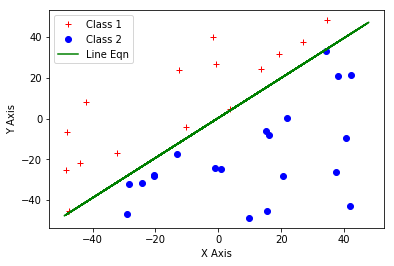

The converged parameters are: [-72.20044196  73.5772246  -25.40301666]


In [6]:
w = fit(X,y)
print("The converged parameters are:",w)

### Task 3
Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required.

#### Working of the algorithm:
    The algorithm initializes all weights randomly and then makes predictions and keeps checking randomly/iteratively with the records in the data set and if there is a misclassification, the algorithm updates the weights and again starts the process of checking until all records are correctly classified.

#### Why the above algorithm converges for linearly separable data?
    The function f(x) = { +1 if w.T.x >0 ,
                          -1 if w.T.x <0
                        }
    A linearly separable data is one where the data/ data points 
    Consider 2 scenarios :
        1. When the actual value 1 and we predict -1 for a particular record that is, when w.T.x <0 , then :        
$\mathbf{w}.T.{x}^{t+1}$ = $\mathbf{w}.T.{x}^{t}$ +  $\mathbf{x}.T.{x}$
   = $\mathbf{w}.T.{x}^{t}$ +  $\|x||^{2}$ >= $\mathbf{w}.T.{x}^{t}$
    
    Thus, the updation of weights basically moving the dot product of w and x and it's function f(x) in the right/positive direction.
    Similar observation can be seen for negative update case too. Thus, the algorithm continuously moves the decision
    boundary in the right direction and eventually arrive at the correct decision boundary to separate the data points/ classes from each other.

### Task 4
What happens when the data is not linearly separable? What can be done to salvage the situation?

#### What happens when the data is not linearly separable?
    When the data is not linearly separable, the number/ cycle of updates cannot be detected or becomes hard to detect and 
    the algorithm would never stop.
    
#### What can be done to salvage the situation?
    There are other variants of this algorithm, and it is called the "Pocket Algorithm" and "Max Over Algorithms", in these algorithms, each set of weights that had the longest streak without any updation are stored so that after the number of cycles tends towards infinity,we can use the stored set of weights in order to identify the best hyperplane that minimizes the classification error or rather the False Positives (FP) and the False Negatives (FN). This approach could be used to handle data which are not linearly separable
    
    Another way would be to transform the data from cartesian coordinate to polar coordinate (or) make any necessary 
    transformation to make the data linearly separable

#### References for the above two answers:

1. https://en.wikipedia.org/wiki/Perceptron

2. https://www.cs.indiana.edu/~predrag/classes/2017fallb365/perceptron.pdf

## Question 2: Linear Regression (40 points)

There are two ways of solving the linear regression problem. The first one is called ordinary least squares, where you learn the parameters of the model by using the closed-form differentitaion of the standard cost function. This method cannot be used if there is no closed-form solution to the derivative of the cost function. In this case, we resort to gradient descent which learn the parameters by iteratively updating them until it reaches the solution i.e. the minimum of the cost function. In this problem we are going to explore both of these implementations. 

Using the code that we are providing in the next few cells, you will:


1. Implement linear regression using the ordinary least squares method
2. Implement linear regression using gradient descent
3. Execute both versions of the linear regression on sklearn's Boston Housing dataset. Plot your results. Which version executes faster? Explain why that is the case.

In [7]:
def feature_normalization(X):
    '''
    In this function we are going to do something similar to what we did in A0, 
    we are going to normalize all the features. Implement the following steps:
    
    - for each feature, calculate its mean
    - substract the mean from their respective feature
    - save the above result in the 'mu' variable
    
    - for each feature, calculate its standard deviation
    - divide each feature by its standard deviation
    - save the above result in the 'sigma' variable
    
    '''
    X_norm = X
    X_norm = pd.DataFrame(X_norm)
    n = X_norm.shape[1]
    mu = np.zeros(n)
    sigma = np.zeros(n)
    for i in range(n):
        mu[i] = np.mean(X_norm.iloc[:,i])
        #print(mu[i])
        sigma[i] = np.std(X_norm.iloc[:,i])
        X_norm.iloc[:,i] = (X_norm.iloc[:,i] - mu[i])/sigma[i]
    #X_norm = np.matrix(X_norm)
    #print(X_norm.head())
    #print(X_norm.shape)
    return X_norm, mu, sigma

In [8]:
def cost_function(X, y, theta):
    '''
    In this function we are going to... you guessed it...
    Implement the cost function!
 
    '''
  
    m = y.size
    cost = 0
    #m = (y.size)*1.0
    #cost = 0
    hy_p = np.dot(X,theta)
    loss = ((hy_p - y)**2)
    loss1 = np.sum(loss)
    cost = (loss1) / (m)
    #predicted_values = np.dot(X, theta)
    #sum_of_square_errors = np.square(predicted_values - y).sum()
    #cost = sum_of_square_errors / (2 * m)


    return cost

In [9]:
def gradient_descent(X, y, theta, learning_rate, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)

    for i in range(0, num_iters):
        '''
          Implement gradient descent for a single gradient step on the parameter 
          vector theta. Save the result of each iteration on J_history.
        '''   
        J_history[i] = cost_function(X, y, theta)
        h_y = np.dot(X,theta)
        loss_derv = (h_y - y)
        gradient = (2*(np.dot(loss_derv,X)))/m
        theta = theta - (learning_rate * gradient)
      
        J_history[i] = cost_function(X, y, theta)

    return theta, J_history

In [10]:
def linearRegression_ols(X, y):
    '''
    Implement the closed-form (or ordinary least squares) solution for
    linear regression. Save the result in the variable 'theta'.
    More information can be found at: 
      https://en.wikipedia.org/wiki/Ordinary_least_squares
    '''
    theta = np.zeros((X.shape[1], 1))
    a = X.T.dot(X)
    b = np.linalg.inv(a)
    c = b.dot(X.T)
    d = c.dot(y)
    theta = d
    

    return theta

In [11]:
# load dataset

from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
y = dataset.target
m = y.size

In [12]:
# Normalize features
print('Normalizing Features ...')

X, mu, sigma = feature_normalization(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X

Normalizing Features ...


Running gradient descent ...
Gradient Descent Running Time is:  0.019281437548044032
Theta computed from gradient descent : 
[ 2.25328063e+01 -8.80945586e-01  1.01239957e+00 -4.06779125e-02
  7.08150287e-01 -1.98897084e+00  2.71377029e+00 -1.31682937e-02
 -3.08581350e+00  2.18811199e+00 -1.55711118e+00 -2.03752834e+00
  8.55441005e-01 -3.72845532e+00]


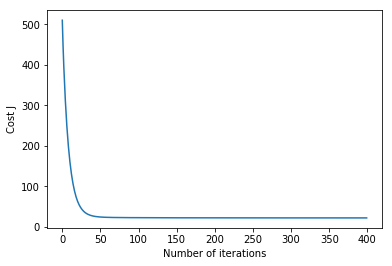

In [13]:
# Now we proceed with Gradient Descent
import timeit



print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.03
num_iters = 400

# Initialize theta and execute gradient descent
theta = np.zeros(X.shape[1])
start = timeit.default_timer()

theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

stop = timeit.default_timer()
print('Gradient Descent Running Time is: ', stop - start)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result
print('Theta computed from gradient descent : \n{}'.format(theta))

In [14]:
# Now we are going to use the ordinary least squares (OLS) linear regression

# re-load dataset

from sklearn.datasets import load_boston
dataset = load_boston()

X = dataset.data
y = dataset.target

X = np.c_[np.ones(m), X] # Add intercept term to X

import timeit

start = timeit.default_timer()

theta = linearRegression_ols(X, y)

stop = timeit.default_timer()
print('OLS Linear Regression Running time is: ', stop - start)

# Display normal equation's result
print('Theta computed from OLS linear regression : \n{}'.format(theta))

OLS Linear Regression Running time is:  0.2533128345451596
Theta computed from OLS linear regression : 
[ 3.64911033e+01 -1.07170557e-01  4.63952195e-02  2.08602395e-02
  2.68856140e+00 -1.77957587e+01  3.80475246e+00  7.51061703e-04
 -1.47575880e+00  3.05655038e-01 -1.23293463e-02 -9.53463555e-01
  9.39251272e-03 -5.25466633e-01]


Now lets do gradient descent with L2-regularization (or Ridge Regression). The next 6 cells are a copy of the template that we provided above with a '_regularization' added at the end of the function name. Feel free to reuse the code that you wrote above but be sure to make the appropriate modifications to the necessary functions to add L2-regularization.

In [15]:
def feature_normalization_regularization(X):
    '''
    In this function we are going to do something similar to what we did in A0, 
    we are going to normalize all the features. Implement the following steps:
    
    - for each feature, calculate its mean
    - substract the mean from their respective feature
    - save the above result in the 'mu' variable
    
    - for each feature, calculate its standard deviation
    - divide each feature by its standard deviation
    - save the above result in the 'sigma' variable
    
    '''
  
    n = X.shape[1]
    X_norm = X
    mu = np.zeros(n)
    sigma = np.zeros(n)
    X_norm = pd.DataFrame(X_norm)
    for i in range(n):
        mu[i] = np.mean(X_norm.iloc[:,i])
        sigma[i] = np.std(X_norm.iloc[:,i])
        X_norm.iloc[:,i] = (X_norm.iloc[:,i] - mu[i])/sigma[i]


    return X_norm, mu, sigma

In [16]:
def cost_function_regularization(X, y, theta,lamda):
    '''
    In this function we are going to... you guessed it...
    Implement the cost function!
 
    '''
  
    m = y.size
    cost = 0
    hy_p = np.dot(X,theta)
    loss = (((hy_p - y)**2)) #+ (lamda*(np.sum(theta**2))))
    loss1 = np.sum(loss)
    cost = (((loss1 + (lamda*(np.sum(theta**2)))) / (m)) if lamda!=0 else (loss1)/m)


    return cost

In [17]:
def gradient_descent_regularization(X, y, theta, learning_rate, num_iters,lamda):
    m = y.size
    J_history = np.zeros(num_iters)

    for i in range(0, num_iters):
        '''
          Implement gradient descent for a single gradient step on the parameter 
          vector theta. Save the result of each iteration on J_history.
        '''
      
        J_history[i] = cost_function_regularization(X, y, theta,lamda)
        h_y = np.dot(X,theta)
        loss_derv = (h_y - y)
        gradient = (2*(np.dot(loss_derv,X)))/m
        reg_term_derv = ((1 - ((2*learning_rate*lamda)/m)) if lamda!=0 else 1)
        a = theta[0]
        #print(a)
        theta = (theta*reg_term_derv) - (learning_rate * gradient)
        b = (learning_rate * gradient)
        #print(b[0])
        theta[0] = a - b[0]
        #print(theta)
        

    return theta, J_history

In [18]:
# load dataset

from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
y = dataset.target
m = y.size

In [19]:
# Normalize features
print('Normalizing Features ...')

X, mu, sigma = feature_normalization_regularization(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X

Normalizing Features ...


Running gradient descent ...
Gradient Descent with Regularization Running time is :  0.023426095051376272
Theta computed from gradient descent : 
[22.53280632 -0.83228887  0.92113822 -0.12637694  0.72047971 -1.77861434
  2.76045686 -0.04777047 -2.84554048  1.87124722 -1.32000677 -1.97684108
  0.85109113 -3.61864801]


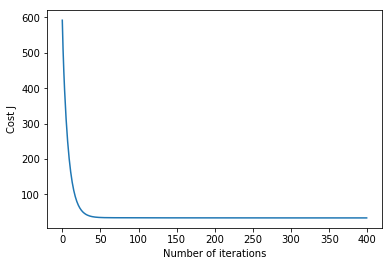

In [20]:
# Now we proceed with Gradient Descent
import timeit



print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.03
num_iters = 400

# Initialize theta and execute gradient descent
theta = np.zeros(X.shape[1])
lamda = 10

start = timeit.default_timer()
theta, J_history = gradient_descent_regularization(X, y, theta, alpha, num_iters,lamda)

stop = timeit.default_timer()
print('Gradient Descent with Regularization Running time is : ', stop - start)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result

print('Theta computed from gradient descent : \n{}'.format(theta))

### Understanding of the above methods:

As we can see from the timers indicated in all 3 algorithms, the OLS Linear Regression has a lesser run time in identifying the best/optimal coefficients

In this case since n (no. of features) is 14 (Intercept + 13 features), the value of 'n' is not pretty large and hence computing dot product and inverse of the 'X' matrix is comparitively faster than running iterations to identify the optimal betas/coefficient.

Now, let's discuss the case where the OLS method will be slower than Gradient Descent
However, if we go ahead and give a large dataset which has a lot of features, let's say n = 1000, then X.T.X will be a n X n matrix and cost of inversion will be very high might take a lot of time

Also, we should be very vareful to remove any redundant fetures and/or delete or remove or perform regularization to reduce feture size else the inverse matrix might be non-invertible (determinant becoming 0)

But yes, in this case since n is pretty small, OLS is faster when compared to gradient descent since gradient descent takes a lot iterations to come up with the optimal coefficient values.

## Question 3: Guess the function (25 points)

Consider three datasets provided with this notebook, namely `data1.csv` and `data2.csv`. Each dataset has 1000 samples. Every sample has 5 features $x_1, x_2, \ldots, x_5$ and a target variable $y$. In each of the datasets, the target variable has been generated from the features of a different unknown function $y$ which is a polynomial containing $J$ terms. In general, $$y=f(\mathbf{x})=\sum_{j=1}^J w_j \prod_{i=1}^5 x_i^{k_{i;j}}$$ where $x_i$ is the $i^{\text {th}}$ feature and $j$ denotes a particular term in the polynomial and $k_{i;j}$ is the power of the $i^{\text{th}}$ feature in the $j^{\text{th}}$ term. It can be any whole number from $0$ to $3$.

Thus $y_1=f_1(\mathbf{x})$;  $y_2=f_2(\mathbf{x})$.

1. Find both the unknown target functions using the given datasets. Use the dedicated cells defined below to write the corresponding methodology and code.
2. Define all your variables such that when we run the corresponding code cell, it should nicely print the correct output which supports your methodology and also prints the right answer.

#### Hints:
1. Remember that $y=f(x)$ is a POLYNOMIAL.
2. The degree of polynomial used in `data1.csv` is 1 and that used in `data2.csv` is $\leq3$.
3. Start with `data1.csv`. It is easy. And then build upon the intution which you get to solve `data2.csv`
4. Rounding off will make things easy and we encourage it. For instance, you can write 2.98 as 3!

### Methodology and answer for function 1

#### Methodology for function 1

Steps followed:
1. Round off the data (Data points and output variable) to 0 decimal points

2. Generate the 6 possibiites and raise each coefficient correspondingly and generate a new data set with 1000 rows and 6 columns (00000 is considered as a possibility to account for the intercept)

3. Call the OLS function (linearRegression_ols function written in the previous question) to obtain thetas and make predictions using it

4. Print the unknown function, actual v/s predicted values and the error metric used (Mean Squared Error)

Note:
1. 00000 is considered as a combination for the purpose of the intercept

2. The code automatically downloads the data set from my github repository to the location from where the user executes the ipynb file / jupyter notebook.

3. Even though this problem could have been solved in a simpler manner, I generated the possibilites since they would pave the platform for the next function

4. If we don't round off the data and the predictions, the error value will be much lower and the predictions would be very close to the actual values
    

In [21]:
## Code for function 1
## Code for function 1
import itertools
list_for_bits = list(itertools.product(['0','1'], repeat=5))
bits_dataframe = pd.DataFrame(np.array(list_for_bits).reshape(32,5), columns = list("01234"))
bits_dataframe = bits_dataframe.iloc[1:,]
bits_dataframe = bits_dataframe.reset_index(drop=True)
bits_dataframe['0'] = bits_dataframe['0'].astype(int)
bits_dataframe['1'] = bits_dataframe['1'].astype(int)
bits_dataframe['2'] = bits_dataframe['2'].astype(int)
bits_dataframe['3'] = bits_dataframe['3'].astype(int)
bits_dataframe['4'] = bits_dataframe['4'].astype(int)
bits_dataframe['sum'] = bits_dataframe['0'] + bits_dataframe['1'] + bits_dataframe['2'] + bits_dataframe['3'] + bits_dataframe['4']
bits_dataframe = bits_dataframe[bits_dataframe['sum']==1]
del bits_dataframe['sum']
bits_dataframe = bits_dataframe.reset_index(drop=True)

## Downloading the file from Github Repository and loading it in jupyter notebook
import requests
from shutil import unpack_archive
from pathlib import Path

#### The below portion of the code was taken from https://stackoverflow.com/questions/13137817/how-to-download-image-using-requests
#url = "https://www.grsampson.net/SUSANNE.tgz"
url = "https://raw.githubusercontent.com/Prashanth1194/AML-Assignment/master/data1.csv"
filename = url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)
#### End of code portion taken from https://stackoverflow.com/questions/13137817/how-to-download-image-using-requests

data1 = pd.read_csv("data1.csv",header=None)
cols = ['X1','X2','X3','X4','X5','y']
data1.columns = cols
data1 = round(data1,0)
#data1['X1'] = data1['X1'].astype(int)
#data1['X2'] = data1['X2'].astype(int)
#data1['X3'] = data1['X3'].astype(int)
#data1['X4'] = data1['X4'].astype(int)
#data1['X5'] = data1['X5'].astype(int)
#data1['y'] =  data1['y'].astype(int)

i=0
X = data1.loc[:, data1.columns != 'y']
y = data1['y']
#y = np.round(y,0)

for k in range(bits_dataframe.shape[0]):
    w = k
    a = X['X1'] ** (bits_dataframe.iloc[k,0])
    b = X['X2'] ** (bits_dataframe.iloc[k,1])
    c = X['X3'] ** (bits_dataframe.iloc[k,2])
    d = X['X4'] ** (bits_dataframe.iloc[k,3])
    e = X['X5'] ** (bits_dataframe.iloc[k,4])
    
    X[w] = (a*b*c*d*e)

X = X.iloc[:,5:]
cols = [4,3,2,1,0]
X = X[cols]
#X.head()
#X
#X.iloc[:,5:]
#X[1023]

#import sklearn.linear_model as sk
y = data1['y']
#X['X0'] = 1
#X = X.iloc[:,:X]
X.insert(0,'X0',1)
n = X.shape[1]
m = np.zeros(X.shape[1])
theta = linearRegression_ols(X, y)
#model = sk.LinearRegression(fit_intercept = False)
#model.fit(X,y)
#theta = model.coef_
data1['Predicted Output'] = np.round(np.dot(X,theta),0) #model.predict(X)
#data1['y_pred_ols'] = np.round(data1['y_pred_ols'],0).astype(int)
#print(theta)
#print(data1.head())

### The unknown target function is :

In [22]:
print("{}+".format(theta[0]))
for i in range(bits_dataframe.shape[0]):
    print("({} * ((X1^{}) + (X2^{}) + (X3^{}) + (X4^{}) + (X5^{}))) + ".format(theta[i+1],bits_dataframe.iloc[i,4],bits_dataframe.iloc[i,3],bits_dataframe.iloc[i,2],bits_dataframe.iloc[i,1],bits_dataframe.iloc[i,0]))


11.93831144396476+
(1.8334391821238707 * ((X1^1) + (X2^0) + (X3^0) + (X4^0) + (X5^0))) + 
(-3.653975713617886 * ((X1^0) + (X2^1) + (X3^0) + (X4^0) + (X5^0))) + 
(-0.032787659481807285 * ((X1^0) + (X2^0) + (X3^1) + (X4^0) + (X5^0))) + 
(3.740523414035964 * ((X1^0) + (X2^0) + (X3^0) + (X4^1) + (X5^0))) + 
(-0.017019947610486447 * ((X1^0) + (X2^0) + (X3^0) + (X4^0) + (X5^1))) + 


### Error metric and the results for the above methodology is :

In [23]:
## Mean Squared Error for the above methodology
print("Mean Squared Error is :",np.sum((data1['y']-data1['Predicted Output'])**2)/1000)
#data1[data1['y'],data1['Predicted Output']]
data1['y'] = np.round(data1['y'],0)
data1.loc[:,['y','Predicted Output']]

Mean Squared Error is : 3.049


,y,Predicted Output
0,8.0,8.0
1,19.0,19.0
2,1.0,-1.0
3,14.0,12.0
4,11.0,12.0
5,8.0,10.0
6,18.0,16.0
7,14.0,16.0
8,8.0,12.0
9,12.0,12.0


### Methodology and answer for function 2

#### Methodology for function 2
    Since the degree of polynomial in given to be less than or equal to 3, each variable has 4 different powers possible and there are totally 5 variables hence totally 4^5 = 1024 possibilites are possible.I generated only 1023 possibilites leaving out the all 0's possibility since I wanted to normalize the data and then add the intercept column

Steps followed:

1. Round off the data (Data points and output variable) to 0 decimal points

2. Generate the 1023 possibiites and raise each coefficient correspondingly and generate a new data set with 1000 rows and 1023 columns

3. Normalize the data using the same the we had written for the previous question.

4. Add the intercept

5. In this case, m < n (Number of rows is less than the number of columns), hence we can proceed with normal equation method/ OLS since the matrix would be non-invertible. Therefore, I decided to go ahead with the linear regression available in the sci-kit learn library

6. Run the linear regression model and make predictions

7. Print the unknown function, actual v/s predicted values and the error metric used (Mean Squared Error)

Note:

1. The code automatically downloads the data set from my github repository to the location from where the user executes the ipynb file / jupyter notebook.

2. We can further improve the results by performing best subset/variable selection using forward or backward selection, performing PCA/ SVD to reduce the dimensionality of the data and also build other models such as SVM Regression with optimal kernal and parameter values, Random Forest Classifier with optimal number of estimators/trees and the number of variables to select for each tree and the depth of the tree and also boosting models and eventually take an ensemble of these methods to improve results  

3. If we don't round off the data and the predictions, the error value will be much lower and the predictions would be very close to the actual values

In [24]:
## Code for function 2
import itertools
'''
list_for_bits = list(itertools.product(['0','1','2','3'], repeat=5))
#list_for_bits = list(itertools.product(['0','1'], repeat=5))
bits_dataframe = pd.DataFrame(np.array(list_for_bits).reshape(1024,5), columns = list("01234"))
#bits_dataframe = bits_dataframe.iloc[1:,]
'''
#list_for_bits = list(itertools.product(['0','1'], repeat=5))
list_for_bits = list(itertools.product(['0','1','2','3'], repeat=5))
bits_dataframe = pd.DataFrame(np.array(list_for_bits).reshape(1024,5), columns = list("01234"))
bits_dataframe = bits_dataframe.iloc[1:,]
bits_dataframe = bits_dataframe.reset_index(drop=True)
bits_dataframe['0'] = bits_dataframe['0'].astype(int)
bits_dataframe['1'] = bits_dataframe['1'].astype(int)
bits_dataframe['2'] = bits_dataframe['2'].astype(int)
bits_dataframe['3'] = bits_dataframe['3'].astype(int)
bits_dataframe['4'] = bits_dataframe['4'].astype(int)
#bits_dataframe['sum'] = bits_dataframe['0'] + bits_dataframe['1'] + bits_dataframe['2'] + bits_dataframe['3'] + bits_dataframe['4']
#bits_dataframe = bits_dataframe[bits_dataframe['sum']<=3]
#del bits_dataframe['sum']
bits_dataframe = bits_dataframe.reset_index(drop=True)

import requests
from shutil import unpack_archive
from pathlib import Path

#### The below portion of the code was taken from https://stackoverflow.com/questions/13137817/how-to-download-image-using-requests
#url = "https://www.grsampson.net/SUSANNE.tgz"
url = "https://raw.githubusercontent.com/Prashanth1194/AML-Assignment/master/data2.csv"
filename = url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)
#### End of code portion taken from https://stackoverflow.com/questions/13137817/how-to-download-image-using-requests    

data2 = pd.read_csv("data2.csv",header=None)
cols = ['X1','X2','X3','X4','X5','y']
data2.columns = cols
data2 = round(data2,0)
#data2['X1'] = data2['X1'].astype(int)
#data2['X2'] = data2['X2'].astype(int)
#data2['X3'] = data2['X3'].astype(int)
#data2['X4'] = data2['X4'].astype(int)
#data2['X5'] = data2['X5'].astype(int)
#data2['y'] =  data2['y'].astype(int)

i=0
X = data2.loc[:, data2.columns != 'y']
y = data2['y']

for k in range(bits_dataframe.shape[0]):
    w = k
    a = X['X1'] ** (bits_dataframe.iloc[k,0])
    b = X['X2'] ** (bits_dataframe.iloc[k,1])
    c = X['X3'] ** (bits_dataframe.iloc[k,2])
    d = X['X4'] ** (bits_dataframe.iloc[k,3])
    e = X['X5'] ** (bits_dataframe.iloc[k,4])
    
    X[w] = (a*b*c*d*e)

X = X.iloc[:,5:]    
#X.head(11)
#X
#X.iloc[:,5:]
#X[1023]

X = np.array(X)
X, mu, sigma = feature_normalization_regularization(X)
X.insert(0,'X0',1)

import sklearn.linear_model as sk

model = sk.LinearRegression(fit_intercept = False)
model.fit(X,y)
theta = model.coef_
y_pred = np.dot(X,theta)
#y_pred = np.round(y_pred,0)#.astype(int)
#y_pred = y_pred
#data2['y_pred'] = y_pred
#data2['y_pred']  = np.round(data2['y_pred'],0)
data2['Predicted Output'] = y_pred
data2['Predicted Output'] = np.round(data2['Predicted Output'],0)

### The unknown target function is :

In [25]:
print("{}+".format(theta[0]))
for i in range(bits_dataframe.shape[0]):
    print("({} * ((X1^{}) + (X2^{}) + (X3^{}) + (X4^{}) + (X5^{}))) + ".format(theta[i+1],bits_dataframe.iloc[i,0],bits_dataframe.iloc[i,1],bits_dataframe.iloc[i,2],bits_dataframe.iloc[i,3],bits_dataframe.iloc[i,4]))

39.56767110000006+
(3.928727653457198e-05 * ((X1^0) + (X2^0) + (X3^0) + (X4^0) + (X5^1))) + 
(0.0012402734753667044 * ((X1^0) + (X2^0) + (X3^0) + (X4^0) + (X5^2))) + 
(0.004378583327275809 * ((X1^0) + (X2^0) + (X3^0) + (X4^0) + (X5^3))) + 
(0.00034007795507040584 * ((X1^0) + (X2^0) + (X3^0) + (X4^1) + (X5^0))) + 
(-1.1612953307521425 * ((X1^0) + (X2^0) + (X3^0) + (X4^1) + (X5^1))) + 
(-0.009441344351665076 * ((X1^0) + (X2^0) + (X3^0) + (X4^1) + (X5^2))) + 
(0.00014822128351088537 * ((X1^0) + (X2^0) + (X3^0) + (X4^1) + (X5^3))) + 
(-4.674470283503782 * ((X1^0) + (X2^0) + (X3^0) + (X4^2) + (X5^0))) + 
(0.0020497994262111963 * ((X1^0) + (X2^0) + (X3^0) + (X4^2) + (X5^1))) + 
(0.0004667675780189451 * ((X1^0) + (X2^0) + (X3^0) + (X4^2) + (X5^2))) + 
(-0.029335346781685978 * ((X1^0) + (X2^0) + (X3^0) + (X4^2) + (X5^3))) + 
(4.541932225294305 * ((X1^0) + (X2^0) + (X3^0) + (X4^3) + (X5^0))) + 
(0.004551178692336066 * ((X1^0) + (X2^0) + (X3^0) + (X4^3) + (X5^1))) + 
(0.060914259464482506 * ((X1

### Error metric and the results for the above methodology is :

In [26]:
## Mean Squared Error for the above methodology
print("Mean Squared Error is :",np.sum((data2['y']-data2['Predicted Output'])**2)/1000)
data2.loc[:,['y','Predicted Output']]

Mean Squared Error is : 6.125541187753848e-26


,y,Predicted Output
0,82.7389,82.7389
1,44.6709,44.6709
2,35.3125,35.3125
3,51.4025,51.4025
4,38.8274,38.8274
5,42.0783,42.0783
6,72.2481,72.2481
7,88.2421,88.2421
8,46.3091,46.3091
9,17.7641,17.7641
